## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

In [3]:
#setting index for joining
title_ratings.set_index('tconst', inplace = True)

In [4]:
#setting index for joing
title_basics.set_index('tconst', inplace =True)

In [5]:
#renamed title_id to tconst to join this data frame into our main data frame
title_akas.rename(columns={'title_id':'tconst'}, inplace=True)
title_akas.set_index('tconst', inplace=True)

In [6]:
#completed first join between title_ratings and title_basics
merged1 = title_ratings.join(title_basics, on='tconst', how='inner')

In [7]:
#completed second join between the above result and title_akas
imdb_data = merged1.join(title_akas, on='tconst', how='inner')

In [8]:
#Since there are lots of missing data and irrelevant data, the data is filtered with only US region
imdb_US_movie = imdb_data[imdb_data['region'] == 'US'].copy()

In [9]:
#sorted in descending order
imdb_US_movie = imdb_US_movie.sort_values(by=['numvotes'], ascending=False).copy()

In [10]:
#dropped all the duplicate titles from the dataframe
imdb_US_movie = imdb_US_movie.drop_duplicates(subset=['original_title'], keep ='first').copy()

In [11]:
#filtered out relevant columns in our dataframe
#setting the index to title
imdb_US_movie = imdb_US_movie.set_index('primary_title').copy()
imdb_US_movie = imdb_US_movie[['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'genres']].copy()
imdb_US_movie.head()

,averagerating,numvotes,start_year,runtime_minutes,genres
primary_title,,,,,
Inception,8.8,1841066,2010,148.0,"Action,Adventure,Sci-Fi"
The Dark Knight Rises,8.4,1387769,2012,164.0,"Action,Thriller"
Interstellar,8.6,1299334,2014,169.0,"Adventure,Drama,Sci-Fi"
Django Unchained,8.4,1211405,2012,165.0,"Drama,Western"
The Avengers,8.1,1183655,2012,143.0,"Action,Adventure,Sci-Fi"


In [12]:
#the mean vote counts is significantly larger than the median.
#This means the data is extremely skewed right.
#Since we don't want to know movies with small number of votes, we will only consider top 10 percent of this data
mean = imdb_US_movie['numvotes'].mean()
median = imdb_US_movie['numvotes'].median()
print(f'mean is {mean} and median is {median}')

mean is 8626.783681653427 and median is 67.0


In [13]:
#10 and 1 percentile of vote counts
ten_percentile = imdb_US_movie['numvotes'].quantile(.90)
one_percentile = imdb_US_movie['numvotes'].quantile(.99)

print("top 10 percentile:", round(ten_percentile))
print("top 1 percentile:", round(one_percentile))

top 10 percentile: 5795
top 1 percentile: 223993


In [14]:
#movies filtered based on the vote counts percentile
top_10_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=5795)].reset_index().copy()
top_1_percent = imdb_US_movie[(imdb_US_movie['numvotes']>=223993)].reset_index().copy()

In [15]:
#divided up multiple genres for a single movie into a separate row
top_10_percent.loc[:,('genres')] = top_10_percent.loc[:,('genres')].str.split(',')
top_10 = top_10_percent.explode('genres')

In [16]:
#filtered out the number of movies within each genres for the top 10 percent vote counts
genres_count_10percent = pd.DataFrame(top_10['genres'].value_counts())
genres_count_10percent = genres_count_10percent.head()
genres_count_10percent

,genres
Drama,1356
Comedy,898
Action,694
Thriller,497
Adventure,475


In [17]:
#created a table with average number of votes for top five movie genre counts
genres_avgvotes_10 = pd.DataFrame(top_10.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_10 = genres_avgvotes_10.reset_index()
genres_avgvotes_10 = genres_avgvotes_10[genres_avgvotes_10['genres'].isin(['Drama','Comedy','Action','Thriller','Adventure'])]
genres_avgvotes_10.set_index('genres', inplace=True)
genres_avgvotes_10

,numvotes
genres,
Adventure,169220.597895
Action,131380.325648
Thriller,78318.523139
Comedy,68912.766147
Drama,68484.173304


In [18]:
#joined the movie counts and average number of votes by genre
top10 = genres_count_10percent.join(genres_avgvotes_10)
top10.rename(columns={'genres':'number of movies'}, inplace=True)
top10

,number of movies,numvotes
Drama,1356,68484.173304
Comedy,898,68912.766147
Action,694,131380.325648
Thriller,497,78318.523139
Adventure,475,169220.597895


In [19]:
#steps repeated for top 1 percent
top_1_percent.loc[:,('genres')] = top_1_percent.loc[:,('genres')].str.split(',')

In [20]:
top_1 = top_1_percent.explode('genres')
top_1

,primary_title,averagerating,numvotes,start_year,runtime_minutes,genres
0,Inception,8.8,1841066,2010,148.0,Action
0,Inception,8.8,1841066,2010,148.0,Adventure
0,Inception,8.8,1841066,2010,148.0,Sci-Fi
1,The Dark Knight Rises,8.4,1387769,2012,164.0,Action
1,The Dark Knight Rises,8.4,1387769,2012,164.0,Thriller
...,...,...,...,...,...,...
258,Creed,7.6,224671,2015,133.0,Drama
258,Creed,7.6,224671,2015,133.0,Sport
259,Moana,7.6,224253,2016,107.0,Adventure
259,Moana,7.6,224253,2016,107.0,Animation


In [21]:
genres_count_1percent = pd.DataFrame(top_1['genres'].value_counts())
genres_count_1 = genres_count_1percent.head()
genres_count_1

,genres
Action,137
Adventure,127
Drama,98
Sci-Fi,64
Comedy,59


In [22]:
genres_avgvotes_1 = pd.DataFrame(top_1.groupby('genres')['numvotes'].mean().sort_values(ascending=False))
genres_avgvotes_1 = genres_avgvotes_1.reset_index()
genres_avgvotes_1 = genres_avgvotes_1[genres_avgvotes_1['genres'].isin(['Drama','Comedy','Action','Sci-Fi','Adventure'])]
genres_avgvotes_1.set_index('genres', inplace=True)
genres_avgvotes_1

,numvotes
genres,
Sci-Fi,490730.984375
Adventure,443631.188976
Action,420961.715328
Drama,407722.265306
Comedy,386693.762712


In [23]:
top1 = genres_count_1.join(genres_avgvotes_1)
top1.rename(columns={'genres':'number of movies'}, inplace=True)
top1

,number of movies,numvotes
Action,137,420961.715328
Adventure,127,443631.188976
Drama,98,407722.265306
Sci-Fi,64,490730.984375
Comedy,59,386693.762712


In [24]:
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-notebook')

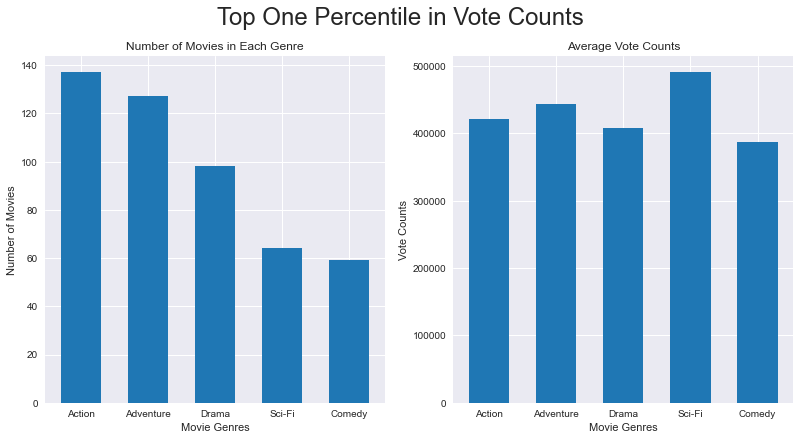

In [25]:
x = np.arange(len(top1.index))
width = 0.6

fig, (ax1, ax2) = plt.subplots(figsize=(11,6), ncols=2, constrained_layout=True)
fig.suptitle("Top One Percentile in Vote Counts", fontsize=24)
ax1.bar(x, top1['number of movies'], width)
ax1.set_xticks(x)
ax1.set_xticklabels(top1.index)
ax1.set_title(('Number of Movies in Each Genre'))
ax1.set_xlabel('Movie Genres')
ax1.set_ylabel('Number of Movies')
ax2.bar(x, top1['numvotes'], width)
ax2.set_xticks(x)
ax2.set_xticklabels(top1.index)
ax2.set_title('Average Vote Counts')
ax2.set_xlabel('Movie Genres')
ax2.set_ylabel('Vote Counts');

In [26]:
top10

,number of movies,numvotes
Drama,1356,68484.173304
Comedy,898,68912.766147
Action,694,131380.325648
Thriller,497,78318.523139
Adventure,475,169220.597895


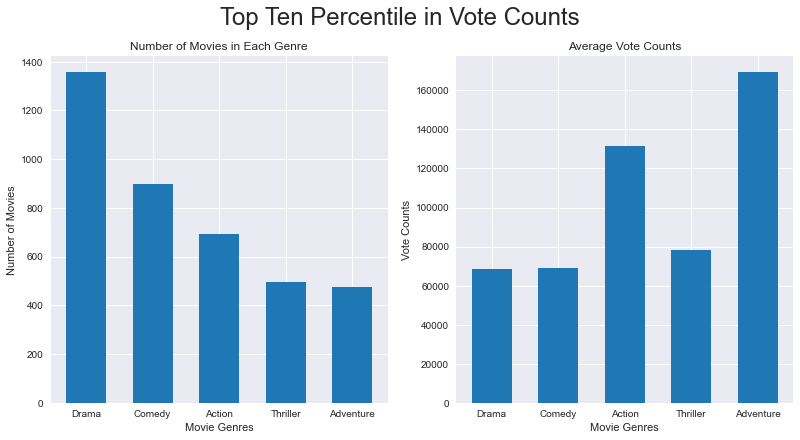

In [27]:
x = np.arange(len(top1.index))
width = 0.6

fig, (ax1, ax2) = plt.subplots(figsize=(11,6), ncols=2, constrained_layout=True)
fig.suptitle("Top Ten Percentile in Vote Counts", fontsize=24)
ax1.bar(x, top10['number of movies'], width)
ax1.set_xticks(x)
ax1.set_xticklabels(top10.index)
ax1.set_title(('Number of Movies in Each Genre'))
ax1.set_xlabel('Movie Genres')
ax1.set_ylabel('Number of Movies')
ax2.bar(x, top10['numvotes'], width)
ax2.set_xticks(x)
ax2.set_xticklabels(top10.index)
ax2.set_title('Average Vote Counts')
ax2.set_xlabel('Movie Genres')
ax2.set_ylabel('Vote Counts');